<a href="https://colab.research.google.com/github/Isi2000/EZFRACTALS/blob/main/Translation_of_cpp_code_to_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python fractals

The purpose of this notebook is to provide a tool to better understand the cpp code to render fractals.

Therefore the code will not be optimized, it will follow the cpp implementation


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
def num_iter(z0, c, max_iter, thresh=4):
    """
    Given a point on the complex plane and a constant c, calculates the orbit using the recursive formula z = z**2 + c.

    Args:
        z0 (complex): Starting point of the orbit.
        c (complex): Complex constant.
        max_iter (int): Maximum number of iterations.
        thresh (float, optional): Arbitrary threshold to determine if the orbit diverges.

    Returns:
        int: Number of iterations before divergence or reaching the maximum number of iterations.
    """
    zn = z0
    it = 0
    while abs(zn) < thresh and it < max_iter:
        zn = zn * zn + c
        it += 1
    return it

def smkdir(name):
    """
    Smart mkdir function that creates a directory if it doesn't exist or if the name is not a directory.

    Args:
        name (str): Name of the directory to be created.

    Returns:
        str: Name of the created or existing directory.
    """
    directory_path = os.path.join(os.getcwd(), name)
    if not os.path.exists(directory_path) or not os.path.isdir(directory_path):
        try:
            os.makedirs(directory_path)
            print("Directory created!!! :)")
        except:
            print("Failed to create directory.")
    return name

    def showb(self):
      """
      function that shows the board, there isn't a countepart in cpp code
      """
      plt.imshow(np.reshape(self.board, (self.dim, self.dim)))
      plt.show()


In [13]:
class Fractals:
    """
    Mother class containing methods and attributes for fractals rendering.
    """
    def __init__(self, dim):
        """
        Initializes a Fractals object.

        Args:
            dim (int): Dimension of the image.
        """
        self.dim = dim
        self.board = [1.0] * (dim * dim)

    def get_dimension(self):
        """
        Get the dimension of the image.

        Returns:
            int: Dimension of the image.
        """
        return self.dim

    def get_board(self):
        """
        Get the board (image) data.

        Returns:
            list: Board data representing the coordinates of the complex plane.
        """
        return self.board

    def board_gen(self, z_real_bound, z_im_bound, center_real, center_im, c=0j, mandel_or_julia=True):
        """
        Modifies the board by applying the recursive formula to assign values (colors) to each coordinate in the complex plane.

        Args:
            z_real_bound (float): Boundaries of the image on the real axis.
            z_im_bound (float): Boundaries of the image on the imaginary axis.
            center_real (float): Center of the image on the real axis.
            center_im (float): Center of the image on the imaginary axis.
            c (complex, optional): Complex constant for generating Julia set. Defaults to 0j.
            mandel_or_julia (bool, optional): True for generating Mandelbrot set, False for Julia set. Defaults to True.
        """
        max_iterations = 300
        for x in range(self.dim):
            for y in range(self.dim):
                real = x * z_real_bound + center_real
                im = y * z_im_bound + center_im
                if mandel_or_julia:
                    number_iterations = num_iter(0.0, complex(real, im), max_iterations)
                else:
                    number_iterations = num_iter(complex(real, im), c, max_iterations)
                self.board[y * self.dim + x] = 1.0 - number_iterations / max_iterations

    def save_to_file(self, filename, dirname):
        """
        Saves the board (image) to a file in a given directory.

        Args:
            filename (str): Name of the file containing data.
            dirname (str): Name of the directory containing the image.
        """
        path = "./"
        fn = os.path.join(path, dirname, f"{filename}.ppm")
        with open(fn, "w") as outfile:
            outfile.write("P3\n")
            outfile.write(f"{self.dim} {self.dim}\n")
            outfile.write("255\n")
            for i in range(self.dim):
                for j in range(self.dim):
                    pixel_value = int(self.board[i * self.dim + j] * 255)
                    outfile.write(f"{pixel_value} {pixel_value} {pixel_value} ")
                outfile.write("\n")

    def show_board_with_plt(self):
      """
      Display the board (image) using the matplotlib library.
      """
      plt.imshow(np.reshape(self.board, (self.dim, self.dim)))
      plt.show()


class Mandelbrot(Fractals):
    """
    Class for creating and visualizing the Mandelbrot set, inheriting from Fractals.
    """
    def __init__(self, dim):
        """
        Initializes a Mandelbrot object.

        Args:
            dim (int): Dimension of the image.
        """
        super().__init__(dim)
        self.data_dir = smkdir("MANDELBROT")

    def boundries(self, scaling_factor):
        """
        Calculates the boundaries of an image of the Mandelbrot set for a given scaling factor.

        Args:
            scaling_factor (float): Scaling factor of the image.

        Returns:
            complex: Complex number representing the boundaries of the image.
        """
        unscaled_real_domain = 2.48
        unscaled_im_domain = 2.26
        z_real_bound = unscaled_real_domain * scaling_factor / (self.get_dimension() - 1)
        z_im_bound = unscaled_im_domain * scaling_factor / (self.get_dimension() - 1)
        return complex(z_real_bound, z_im_bound)

    def mandelbrot_generator(self, scaling_factor, center_real, center_im):
        """
        Creates the Mandelbrot set and saves it to a file.

        Args:
            scaling_factor (float): Level of zoom on the image.
            center_real (float): Center of the image on the real axis.
            center_im (float): Center of the image on the imaginary axis.
        """
        mandelbrot_mode = True
        real_bound = self.boundries(scaling_factor).real
        im_bound = self.boundries(scaling_factor).imag
        zoom_center_real = center_real - 2.0 * scaling_factor
        zoom_center_im = center_im - 1.13 * scaling_factor
        self.board_gen(real_bound, im_bound, zoom_center_real, zoom_center_im, mandelbrot_mode)
        filename = str(scaling_factor)
        self.save_to_file(filename, self.data_dir)

    def mandelbrot_multiple_images(self, end_scaling_factor, step, zoom_center_real, zoom_center_im):
        """
        Generates multiple images of the Mandelbrot set by calling the mandelbrot_generator function.

        Args:
            end_scaling_factor (float): Last scaling factor before stopping zoom.
            step (float): How much the scaling factor changes between each image.
            zoom_center_real (float): Center of the image on the real axis.
            zoom_center_im (float): Center of the image on the imaginary axis.
        """
        scaling_factor = 3.0
        while scaling_factor > end_scaling_factor:
            scaling_factor -= step
            self.mandelbrot_generator(scaling_factor, zoom_center_real, zoom_center_im)

class Julia(Fractals):
    """
    Class for creating and visualizing Julia sets, inheriting from Fractals.
    """
    def __init__(self, dim):
        """
        Initializes a Julia object.

        Args:
            dim (int): Dimension of the image.
        """
        super().__init__(dim)
        self.data_dir = smkdir("JULIA")

    def julia_generator(self, c):
        """
        Generates a single Julia set for a given complex constant c.

        Args:
            c (complex): Complex constant associated with the Julia set.
        """
        julia_mode = False
        unscaled_real_domain = 4
        unscaled_im_domain = 4
        real_bound = unscaled_real_domain / (self.get_dimension() - 1)
        im_bound = unscaled_im_domain / (self.get_dimension() - 1)
        center_real = -2.0
        center_im = -2.0
        self.board_gen(real_bound, im_bound, center_real, center_im, c, julia_mode)
        filename = f"{c.real}_{c.imag}"
        self.save_to_file(filename, self.data_dir)

    def julia_multiple_images(self, num_points, step):
        """
        Generates multiple images of Julia sets by calling the julia_generator function.

        Args:
            num_points (int): Number of images generated.
            step (float): How much the c constant changes between each generated image.
        """
        for i in range(num_points):
            real_c = 0.0 + i * step
            imag_c = 0.0 - i * step
            c = complex(real_c, imag_c)
            self.julia_generator(c)



In [ ]:
def main():
    image_dimension = 300  # Set the desired image dimension here

    # Create an instance of the Mandelbrot class
    mandelbrot = Mandelbrot(image_dimension)

    # Create an instance of the Julia class
    julia = Julia(image_dimension)

    # Customization and Rendering of Fractals
    # =======================================

    # Example 1: Generate a Mandelbrot set
    scaling_factor = 2.0  # Set the desired scaling factor for the Mandelbrot set
    center_real = 0.0  # Set the desired center point on the real axis
    center_im = 0.0  # Set the desired center point on the imaginary axis
    mandelbrot.mandelbrot_generator(scaling_factor, center_real, center_im)

    # Example 2: Generate multiple Mandelbrot sets with different scaling factors
    end_scaling_factor = 0.3  # Set the last scaling factor before stopping zoom
    step = 0.1  # Set the step size for changing the scaling factor
    zoom_center_real = -0.8  # Set the desired center point on the real axis for zooming
    zoom_center_im = 0.156  # Set the desired center point on the imaginary axis for zooming
    mandelbrot.mandelbrot_multiple_images(end_scaling_factor, step, zoom_center_real, zoom_center_im)

    # Example 3: Generate a Julia set with a specific complex constant 'c'
    c = complex(0.355, 0.355)  # Set the desired complex constant 'c'
    julia.julia_generator(c)

    # Example 4: Generate multiple Julia sets with different complex constants 'c'
    num_points = 9  # Set the number of Julia sets to generate
    step_julia = 0.05  # Set the step size for changing the complex constant 'c'
    julia.julia_multiple_images(num_points, step_julia)

    return 0

if __name__ == "__main__":
    main()


# Examples

In the following examples one can easily visualize using matplotlib the rendering of the fractals. Despite beeing less efficient with this code one can bypass the ppm format if non supported and also play around with the code visualizing right away the rendereing

Have fun!

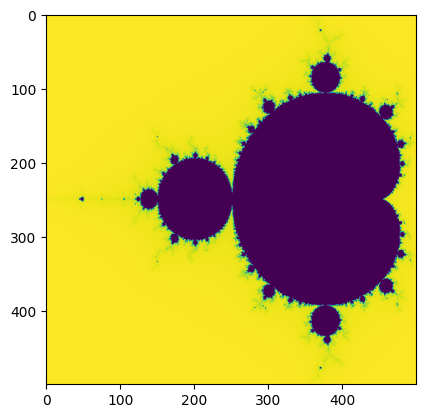

In [21]:
mandel_ex = Mandelbrot(500)
mandel_ex.mandelbrot_generator(1, 0, 0)
mandel_ex.show_board_with_plt()

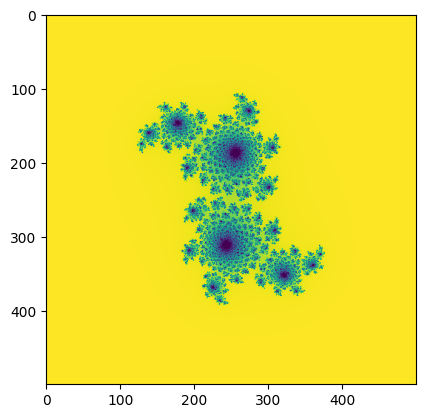

In [20]:
c = complex(0.3, -0.45)
julia_ex = Julia(500)
julia_ex.julia_generator(c)
julia_ex.show_board_with_plt()